In [2]:
import cv2
import os
import numpy as np
import torch
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
import matplotlib.pyplot as plt
from icecream import ic

In [3]:
def init_panoptic_segmentation():
        cfg = get_cfg()
        cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
        cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
        cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
        return DefaultPredictor(cfg)
predictor = init_panoptic_segmentation()

In [4]:
def get_panoptic_masks(image):
        rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        panoptic_seg, segments_info = predictor(rgb_image)["panoptic_seg"]
        
        things_mask = np.zeros_like(image, dtype=bool)
        stuff_mask = np.zeros_like(image, dtype=bool)
        for seg in segments_info:
            # ic(seg.keys())
            if seg["isthing"]:
                things_mask |= (panoptic_seg.cpu().numpy() == seg["id"])
            else:
                stuff_mask |= (panoptic_seg.cpu().numpy() == seg["id"])
                # cv2.imshow(stuff_mask)
        unknown_mask = ~(things_mask | stuff_mask)
        return things_mask, stuff_mask, unknown_mask



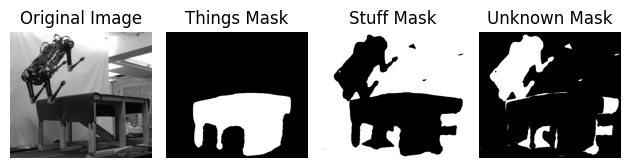

In [ ]:
things, stuff, unkniwn = get_panoptic_masks(cv2.imread("cheetah3_jumping_pic.jpg"))
img = cv2.imread("cheetah3_jumping_pic.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
things, stuff, unkniwn = get_panoptic_masks(img)

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(things, cmap='gray')
plt.title('Things Mask')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(stuff, cmap='gray')
plt.title('Stuff Mask')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(unkniwn, cmap='gray')
plt.title('Unknown Mask')
plt.axis('off')
plt.tight_layout()
plt.show()

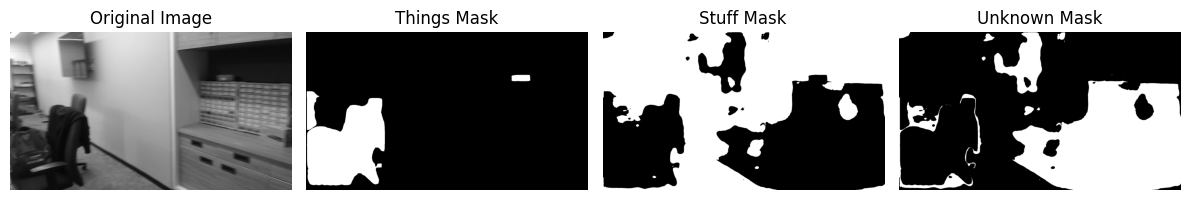

In [8]:
img = cv2.imread("/home/mahesh/vio/office_static/image_l/190.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
things, stuff, unkniwn = get_panoptic_masks(img)


plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(things, cmap='gray')
plt.title('Things Mask')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(stuff, cmap='gray')
plt.title('Stuff Mask')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(unkniwn, cmap='gray')
plt.title('Unknown Mask')
plt.axis('off')
plt.tight_layout()
plt.show()

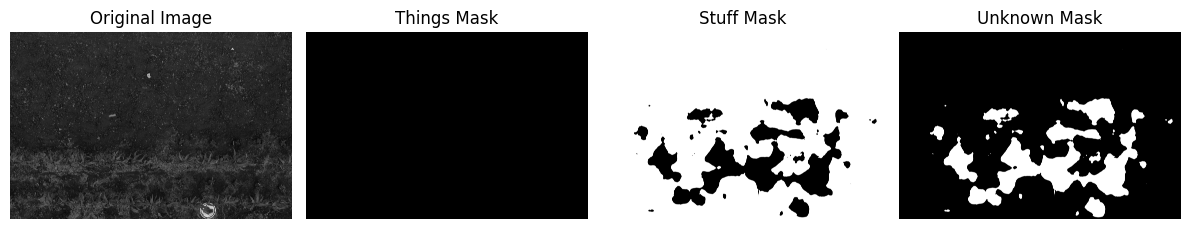

In [ ]:

img = cv2.imread("/home/mahesh/vio/Aerial_Images/UASs_18.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
things, stuff, unkniwn = get_panoptic_masks(img)


plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(things, cmap='gray')
plt.title('Things Mask')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(stuff, cmap='gray')
plt.title('Stuff Mask')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(unkniwn, cmap='gray')
plt.title('Unknown Mask')
plt.axis('off')
plt.tight_layout()
plt.show()

/home/mahesh/miniconda3/envs/detectron2/lib/python3.10/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


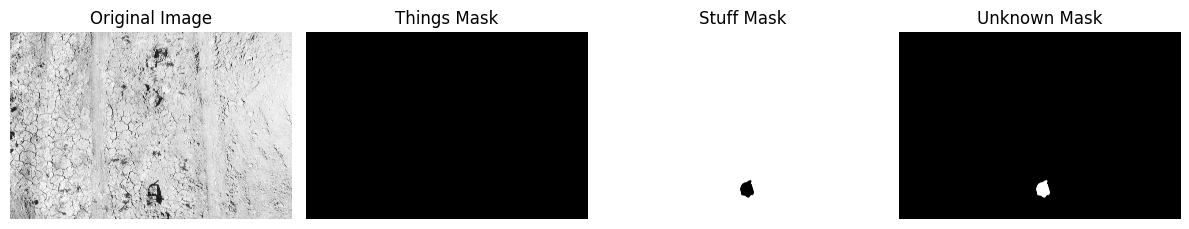

In [4]:

img = cv2.imread("/home/mahesh/vio/Aerial_Images/UASs_1010.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
things, stuff, unkniwn = get_panoptic_masks(img)


plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(things, cmap='gray')
plt.title('Things Mask')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(stuff, cmap='gray')
plt.title('Stuff Mask')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(unkniwn, cmap='gray')
plt.title('Unknown Mask')
plt.axis('off')
plt.tight_layout()
plt.show()